# 로지스틱 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 럭키백의 확률

### 데이터 준비하기

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# 'Species' 열에서 고유한 값들을 추출하여 출력합니다
# pd.unique() 함수는 주어진 열에서 중복을 제거한 고유한 값들의 배열을 반환합니다
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
import pandas as pd  # Pandas 라이브러리에서 데이터 분석을 위한 모듈을 불러옵니다

# 'fish' DataFrame에서 'Weight', 'Length', 'Diagonal', 'Height', 'Width' 열만 선택하여 새로운 DataFrame을 만듭니다
# .to_numpy() 메서드를 사용하여 이 DataFrame을 NumPy 배열로 변환합니다
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()


In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler  # Scikit-learn에서 표준화(정규화)를 위한 StandardScaler 클래스를 불러옵니다

# StandardScaler 객체를 생성합니다
# StandardScaler는 데이터를 표준화하여 평균이 0, 표준편차가 1이 되도록 변환합니다
ss = StandardScaler()

# 훈련 데이터를 사용하여 StandardScaler를 학습합니다
# 이 단계에서 훈련 데이터의 평균과 표준편차를 계산하여 나중에 변환에 사용합니다
ss.fit(train_input)

# 훈련 데이터를 표준화하여 새로운 배열을 생성합니다
# 각 특성의 평균이 0, 표준편차가 1이 되도록 변환합니다
train_scaled = ss.transform(train_input)

# 테스트 데이터도 같은 방식으로 표준화합니다
# 훈련 데이터에서 계산한 평균과 표준편차를 사용하여 테스트 데이터를 변환합니다
test_scaled = ss.transform(test_input)


### k-최근접 이웃 분류기의 확률 예측

In [19]:
from sklearn.neighbors import KNeighborsClassifier  # Scikit-learn에서 K-최근접 이웃 분류기 클래스를 불러옵니다

# K-최근접 이웃 분류기 모델 객체를 생성합니다
# n_neighbors=3은 최근접 이웃의 개수를 3으로 설정합니다
kn = KNeighborsClassifier(n_neighbors=3)

# 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
kn.fit(train_scaled, train_target)

# 훈련 데이터에 대한 모델의 정확도(정확한 예측 비율)를 출력합니다
print(kn.score(train_scaled, train_target))

# 테스트 데이터에 대한 모델의 정확도(정확한 예측 비율)를 출력합니다
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


In [20]:
# 학습된 K-최근접 이웃 분류기 모델의 클래스 레이블을 출력합니다
# kn.classes_는 모델이 인식하는 모든 클래스 레이블을 배열 형태로 반환합니다
print(kn.classes_)


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [22]:
# 테스트 데이터의 첫 5개 샘플에 대해 모델이 예측한 클래스 레이블을 출력합니다
# test_scaled[:5]는 테스트 데이터의 첫 5개 샘플을 선택합니다
# kn.predict() 메서드는 주어진 데이터에 대해 모델이 예측한 클래스 레이블을 반환합니다
print(kn.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [27]:
import numpy as np  # NumPy 라이브러리를 불러옵니다. 수학적 연산 및 배열 작업을 위한 도구입니다

# K-최근접 이웃 분류기 모델을 사용하여 테스트 데이터의 첫 5개 샘플에 대한 예측 확률을 계산합니다
# kn.predict_proba() 메서드는 각 클래스에 대한 확률을 반환합니다
proba = kn.predict_proba(test_scaled[:5])

# np.round() 함수는 배열의 값을 지정된 소수점 자리까지 반올림합니다
print(np.round(proba, decimals=4)) # decimals = 4 소수점 4자리까지 출력


[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [29]:
# K-최근접 이웃 분류기 모델을 사용하여 테스트 데이터의 4번째 샘플(test_scaled[3:4])에 대한 최근접 이웃을 찾습니다
# kn.kneighbors() 메서드는 입력 샘플에 대해 가장 가까운 이웃의 거리와 인덱스를 반환합니다
distances, indexes = kn.kneighbors(test_scaled[3:4])

# 찾은 최근접 이웃의 인덱스를 사용하여 훈련 데이터에서 해당 샘플의 타겟 값을 출력합니다
# train_target[indexes]는 최근접 이웃 인덱스를 사용하여 훈련 타겟 데이터를 인덱싱하여 이웃 샘플의 타겟 값을 가져옵니다
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.97811873 0.980159

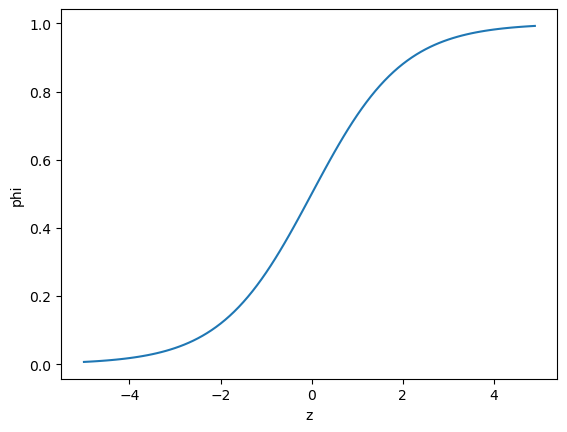

In [33]:
import numpy as np  # NumPy 라이브러리를 불러옵니다. 수학적 연산 및 배열 작업을 위한 도구
import matplotlib.pyplot as plt  # Matplotlib 라이브러리에서 시각화 도구

# -5에서 5까지 0.1 간격으로 숫자를 생성하여 배열을 만듭니다
# np.arange() 함수는 주어진 범위와 간격으로 배열을 생성합니다
z = np.arange(-5, 5, 0.1)
# print(z)
# 시그모이드 함수의 값을 계산합니다
# 시그모이드 함수는 입력 값을 0과 1 사이로 변환합니다
phi = 1 / (1 + np.exp(-z))
print(phi)
# 시그모이드 함수의 결과를 z 값에 대해 플로팅합니다
plt.plot(z, phi)

# x축 레이블을 'z'로 설정합니다
plt.xlabel('z')

# y축 레이블을 'phi'로 설정합니다
plt.ylabel('phi')

# 생성된 플롯을 화면에 표시합니다
plt.show()


### 로지스틱 회귀로 이진 분류 수행하기

In [36]:
import numpy as np  # NumPy 라이브러리를 불러옵니다. 수학적 연산 및 배열 작업을 위한 도구입니다

# 문자 배열을 생성합니다
# 'char_arr'는 문자 요소를 가진 NumPy 배열입니다
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# 불리언 배열을 사용하여 'char_arr'에서 특정 요소를 선택합니다
# 불리언 배열 [True, False, True, False, False]에 해당하는 인덱스의 요소만 선택됩니다
print(char_arr[[True, False, True, False, False]])


['A' 'C']


In [37]:
# 'train_target' 배열에서 'Bream' 또는 'Smelt'인 샘플의 인덱스를 찾습니다
# | (논리적 OR 연산자)를 사용하여 두 조건 중 하나라도 참인 경우를 선택합니다
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# 'train_scaled' 배열에서 'bream_smelt_indexes' 조건을 만족하는 샘플만 선택하여 새로운 배열을 생성합니다
# 선택된 샘플들은 'Bream' 또는 'Smelt'인 경우에 해당합니다
train_bream_smelt = train_scaled[bream_smelt_indexes]

# 'train_target' 배열에서 'bream_smelt_indexes' 조건을 만족하는 타겟 값만 선택하여 새로운 배열을 생성합니다
# 선택된 타겟 값들은 'Bream' 또는 'Smelt'인 경우에 해당합니다
target_bream_smelt = train_target[bream_smelt_indexes]


In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [43]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [44]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [45]:
print(lr.classes_)

['Bream' 'Smelt']


In [47]:
# 선형 회귀 모델(lr)의 회귀 계수(coef_)와 절편(intercept_)을 출력합니다
# lr.coef_는 각 특성(feature)별 회귀 계수를 나타내며,
# lr.intercept_는 회귀 직선의 절편을 나타냅니다
print(lr.coef_, lr.intercept_)


[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [50]:
# 선형 회귀 모델(lr)을 사용하여 'train_bream_smelt' 데이터의 첫 5개 샘플에 대해 결정 함수를 계산합니다
# 결정 함수(decision_function)는 각 샘플에 대해 모델이 예측한 연속적 값(점수)를 반환합니다
decisions = lr.decision_function(train_bream_smelt[:5])

# 계산된 결정 함수의 값을 출력합니다
# 결정 함수 값은 각 샘플에 대해 모델의 예측 점수를 나타냅니다
print(decisions)


[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


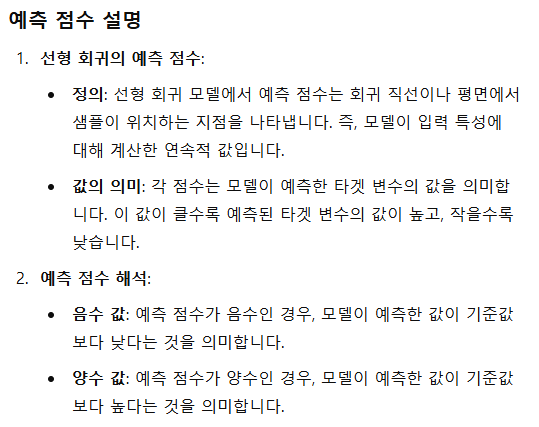

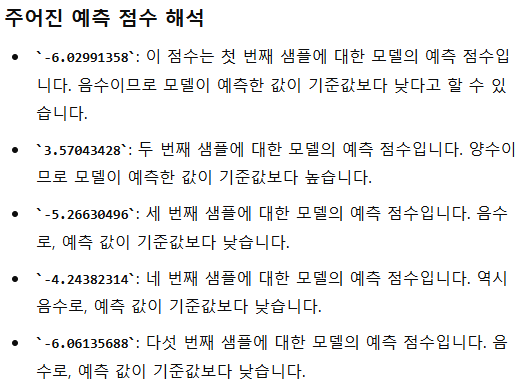

In [52]:
from scipy.special import expit  # 시그모이드 함수(로지스틱 함수)를 제공하는 expit 함수를 불러옵니다

# 결정 함수(decision_function)로부터 얻은 예측 점수를 시그모이드 함수를 통해 변환합니다
# expit 함수는 입력 값에 대해 시그모이드 함수를 적용하여 0과 1 사이의 값을 반환합니다
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행하기

In [54]:
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델을 제공하는 클래스를 불러옵니다

# 로지스틱 회귀 모델을 생성합니다
# C=20: 정규화 강도를 조절하는 하이퍼파라미터로, 값이 클수록 정규화가 약해집니다
# max_iter=1000: 최대 반복 횟수로, 모델 학습을 위한 반복 횟수를 설정합니다
lr = LogisticRegression(C=20, max_iter=1000)

# 훈련 데이터(train_scaled)와 타겟 데이터(train_target)를 사용하여 로지스틱 회귀 모델을 학습합니다
lr.fit(train_scaled, train_target)

# 훈련 데이터에 대한 모델의 정확도를 출력합니다
# 학습 데이터에서의 정확도는 모델이 훈련 데이터에서 얼마나 잘 맞는지를 나타냅니다
print(lr.score(train_scaled, train_target))

# 테스트 데이터에 대한 모델의 정확도를 출력합니다
# 테스트 데이터에서의 정확도는 모델이 이전에 보지 못한 데이터에서 얼마나 잘 맞는지를 나타냅니다
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [55]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [61]:
# 로지스틱 회귀 모델을 훈련시킵니다
# lr = LogisticRegression(C=20, max_iter=1000)
# lr.fit(train_scaled, train_target)

# 테스트 데이터의 첫 5개 샘플에 대해 예측 확률을 계산합니다
# predict_proba 함수는 각 샘플에 대해 클래스별 확률을 반환합니다
proba = lr.predict_proba(test_scaled[:5])

# np.round 함수는 배열의 각 요소를 지정된 소수점 자리까지 반올림합니다
print(np.round(proba, decimals=3))  # 예측 확률을 소수점 3자리까지 반올림하여 출력합니다


[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [62]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [64]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [69]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


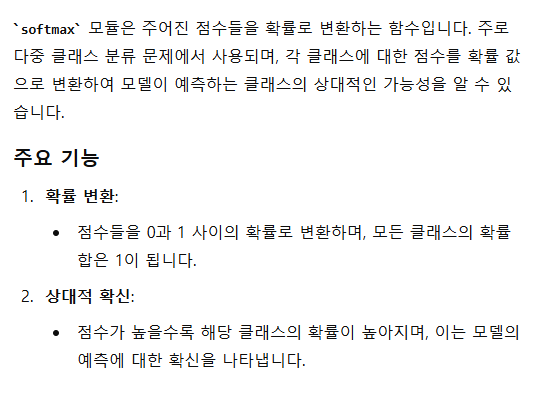

In [73]:
from scipy.special import softmax  # 소프트맥스 함수를 제공하는 모듈을 불러옵니다

# 'decision' 배열이 모델의 결정 함수 값이라면, 이를 소프트맥스 함수를 사용하여 확률로 변환합니다
# 'decision'은 각 샘플에 대해 클래스별 점수를 담고 있는 배열입니다
proba = softmax(decision, axis=1)

# 소프트맥스 함수로 변환된 확률 값을 소수점 3자리까지 반올림하여 출력합니다
# np.round 함수는 배열의 각 요소를 지정된 소수점 자리까지 반올림합니다
print(np.round(proba, decimals=3))


[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
